In [102]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io # import tiff file as ndarray
import pickle
from skimage.segmentation import find_boundaries # for generating boundaries
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots


# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

import matplotlib.pyplot as plt # had to move cuz plt coded as matplotlib?

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set-up variables
in_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/output_figs/"

In [4]:
# import data

# import STeg_OMC_220429
steg_omc = io.imread(in_path+"STeg_OMC_220429_b2_hand_straightened_norm_subtracted.tif", plugin="tifffile")

# import STeg_ACC_230308
steg_acc = io.imread(in_path+"STeg_ACC_230308_align_220429_norm_subtracted.tif", plugin="tifffile")

# import MMus_OMC_220303
mmus_omc = io.imread(in_path+"MMus_OMC_220303_b1_hand_straightened_norm_subtracted.tif", plugin="tifffile")

# ipmort MMus_ACC_230404
mmus_acc = io.imread(in_path+"MMus_ACC_230404_align_220303_norm_subtracted.tif", plugin="tifffile")

In [5]:
# load atlases
steg_reg_atlas = io.imread(in_path+"Steg_220429_registered_atlas_RESIZED.tif", plugin="tifffile")

mmus_reg_atlas = io.imread(in_path+"MMus_220303_registered_atlas_RESIZED.tif", plugin="tifffile")


In [6]:
data = [steg_omc, steg_acc, mmus_omc, mmus_acc]
titles = ["STeg OMC", "STeg ACC", "MMus OMC", "MMus ACC"]

# set image parameters
ar = 1 # aspect ratio of all images
gs = 3 # sigma to use for gaussian smoothing
save_dpi = 300

In [7]:
# load masks for steg and mmus

areas = ["grey", "CTX", "TH", "STR", "CP", "P", "MB", "PAG", "SCm", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU"]

mmus_masks = []
steg_masks = []

# load mmus masks
for area in areas:
    with open(in_path+"masks/MMus_220303_"+area+".npy", "rb") as f:
            mmus_masks.append(np.load(f))

# load steg masks
for area in areas:
    with open(in_path+"masks/STeg_220429_"+area+".npy", "rb") as f:
            steg_masks.append(np.load(f))

In [10]:
print(mmus_masks[0].shape)
print(areas[0])

(212, 554, 682)
grey


In [17]:
mask_order = ["grey", "CTX", "STR", "CP"]
mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
flur_keep = "STR"
flur_index = areas.index(flur_keep)


[0, 1, 3, 4]
3


In [39]:
plt

<module 'matplotlib.pyplot' from '/Users/eisko/miniconda3/envs/STP_analysis/lib/python3.10/site-packages/matplotlib/pyplot.py'>

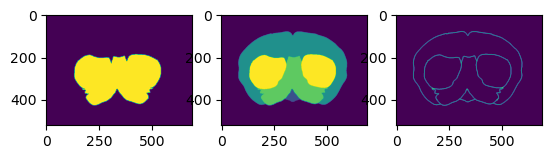

In [45]:
# STR slice outline
mask_order = ["grey", "CTX", "STR", "CP"]
mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
mask_list = [array for i, array in enumerate(steg_masks) if i in mask_indices]


flur_keep = "STR"
flur_index = areas.index(flur_keep)
stri = steg_masks[flur_index]

stri_slice_mask, stri_slice_boundaries = slice_boundaries(mask_list, stri, scaling_factor=25000)


fig, axs = plt.subplots(1,3)
axs[0].imshow(stri.max(axis=0))
axs[1].imshow(stri_slice_mask)
# plt.colorbar()
axs[2].imshow(stri_slice_boundaries)
# plt.colorbar()
plt.show()

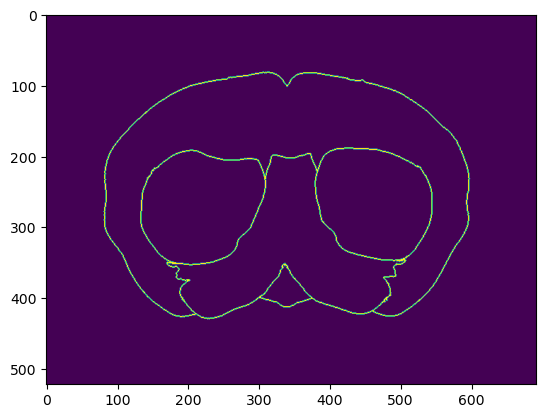

In [101]:
# STR slice outline
mask_order = ["grey", "CTX", "STR", "CP"]
mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
mask_list = [array for i, array in enumerate(steg_masks) if i in mask_indices]


flur_keep = "STR"
flur_index = areas.index(flur_keep)
stri = steg_masks[flur_index]

im = make_boundaries(areas_list=mask_order, mask_list=steg_masks, roi="STR")

plt.imshow(im)
plt.show()

In [111]:
areas.index('STR')
print(len(areas))
len(steg_masks)

15


15

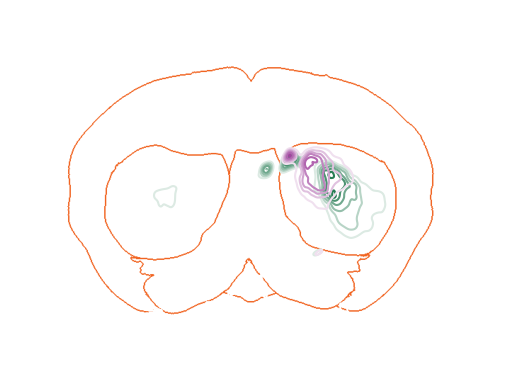

In [148]:
# striatum
str_outline = make_boundaries(areas_list=mask_order, mask_list=steg_masks, roi="STR")
str_mask = steg_masks[areas.index('STR')]
fig, axs = plt.subplots()

slice_to_contour(steg_omc, str_mask, cmap=green_cmp)
slice_to_contour(steg_acc, str_mask, cmap=purple_cmp)
axs.set_aspect(ar)
axs.axis('off')
plt.imshow(str_outline, cmap=orange_cmp, aspect=1)
plt.show()


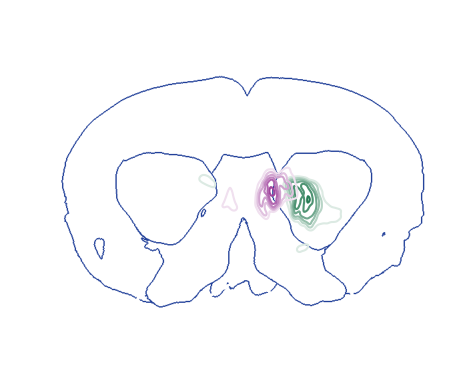

In [149]:
# striatum - mmus
str_outline = make_boundaries(areas_list=mask_order, mask_list=mmus_masks, roi="STR")
str_mask = mmus_masks[areas.index('STR')]


fig, axs = plt.subplots()

slice_to_contour(mmus_omc, str_mask, cmap=green_cmp)
slice_to_contour(mmus_acc, str_mask, cmap=purple_cmp)
axs.set_aspect(ar)
axs.axis('off')
plt.imshow(str_outline, cmap=blue_cmp, aspect=1)
plt.show()


In [160]:
areas

['grey',
 'CTX',
 'TH',
 'STR',
 'CP',
 'P',
 'MB',
 'PAG',
 'HY',
 'CNU',
 'TEa',
 'ECT',
 'VISC',
 'AI',
 'GU']

In [159]:
# PAG

omc = [steg_omc, mmus_omc]
acc = [steg_acc, mmus_acc]
sp_masks = [steg_masks, mmus_masks]
colors = [orange_cmp, blue_cmp]



for n in range(2):
    mask_order = ["grey", "CTX", "SCm", "PAG"]
    mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
    mask_list = [array for i, array in enumerate(sp_masks[n]) if i in mask_indices]

    outline = make_boundaries(areas_list=mask_order, mask_list=sp_masks[n], roi="PAG")
    mask = sp_masks[n][areas.index('PAG')]

    fig, axs = plt.subplots()

    slice_to_contour(omc[n], mask, cmap=green_cmp)
    slice_to_contour(acc[n], mask, cmap=purple_cmp)
    axs.set_aspect(ar)
    axs.axis('off')
    axs.imshow(outline, cmap=colors[n], aspect=1)
    plt.show()



ValueError: 'SCm' is not in list

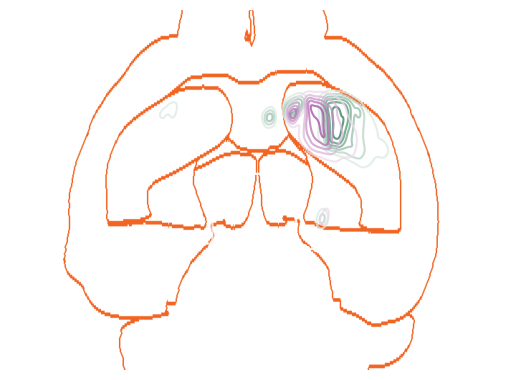

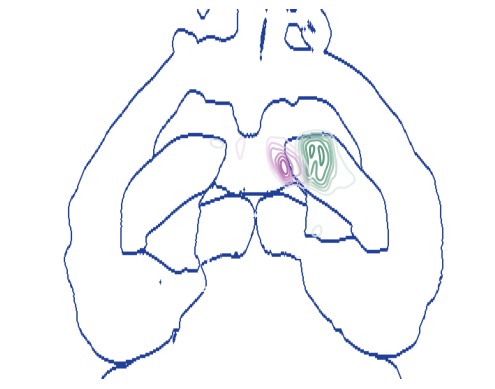

In [162]:
# striatum top
# stri_tran = np.transpose(stri_keep, (1,0,2))

ar = 2.5

steg_masks_top = [np.transpose(array, (1,0,2)) for array in steg_masks]
mmus_masks_top = [np.transpose(array, (1,0,2)) for array in mmus_masks]


omc = [np.transpose(steg_omc, (1,0,2)), np.transpose(mmus_omc, (1,0,2))]
acc = [np.transpose(steg_acc, (1,0,2)), np.transpose(mmus_acc, (1,0,2))]
sp_masks = [steg_masks_top, mmus_masks_top]
colors = [orange_cmp, blue_cmp]



for n in range(2):
    mask_order = ["grey", "CTX", "STR", "CP"]
    mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
    mask_list = [array for i, array in enumerate(sp_masks[n]) if i in mask_indices]

    outline = make_boundaries(areas_list=mask_order, mask_list=sp_masks[n], roi="STR")
    mask = sp_masks[n][areas.index('STR')]

    fig, axs = plt.subplots()

    slice_to_contour(omc[n], mask, cmap=green_cmp)
    slice_to_contour(acc[n], mask, cmap=purple_cmp)
    axs.set_aspect(ar)
    axs.axis('off')
    axs.imshow(outline, cmap=colors[n], aspect=ar)
    plt.show()



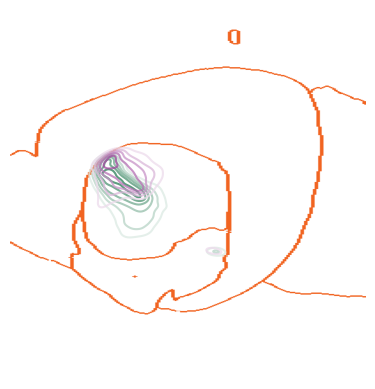

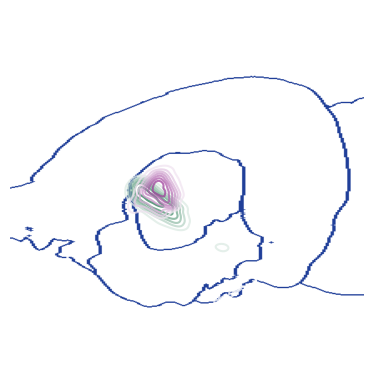

In [165]:
# striatum top
rotation = (2,1,0)

ar = 1/2.5

steg_masks_top = [np.transpose(array, rotation) for array in steg_masks]
mmus_masks_top = [np.transpose(array, rotation) for array in mmus_masks]


omc = [np.transpose(steg_omc, rotation), np.transpose(mmus_omc, rotation)]
acc = [np.transpose(steg_acc, rotation), np.transpose(mmus_acc, rotation)]
sp_masks = [steg_masks_top, mmus_masks_top]
colors = [orange_cmp, blue_cmp]



for n in range(2):
    mask_order = ["grey", "CTX", "STR", "CP"]
    mask_indices = [i for i, val in enumerate(areas) if val in mask_order]
    mask_list = [array for i, array in enumerate(sp_masks[n]) if i in mask_indices]

    outline = make_boundaries(areas_list=mask_order, mask_list=sp_masks[n], roi="STR")
    mask = sp_masks[n][areas.index('STR')]

    fig, axs = plt.subplots()

    slice_to_contour(omc[n], mask, cmap=green_cmp)
    slice_to_contour(acc[n], mask, cmap=purple_cmp)
    axs.set_aspect(ar)
    axs.axis('off')
    axs.imshow(outline, cmap=colors[n], aspect=ar)
    plt.show()

